In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("train_final.csv")
test_data = pd.read_csv("test_final.csv")

In [3]:
train_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income>50K
0,53,Self-emp-not-inc,93449,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1
1,33,Self-emp-not-inc,123424,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,47,Private,144844,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,40,Private,114580,HS-grad,9,Divorced,Craft-repair,Other-relative,White,Female,0,0,40,Vietnam,0
4,39,Private,115618,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0


In [4]:
test_data=test_data.drop('ID',axis=1,inplace=False)

In [5]:
train_data['fnlwgt'] = train_data['fnlwgt'].apply(lambda x: np.log1p(x))
test_data['fnlwgt'] = test_data['fnlwgt'].apply(lambda x: np.log1p(x))

In [6]:
#Education and Education_num,delete one and keep one
train_data = train_data.drop('education',axis=1,inplace=False)

In [7]:
test_data=test_data.drop('education',axis=1,inplace=False)

In [8]:
train_data.replace('?', np.nan, inplace=True)

In [9]:
test_data.replace('?', np.nan, inplace=True)

In [10]:
train_data.isnull().any()

age               False
workclass          True
fnlwgt            False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income>50K        False
dtype: bool

In [11]:
#Workclass Occupation Country: ?
test_data["workclass"] = test_data["workclass"].fillna("Private")
test_data["occupation"] =test_data["occupation"].fillna("Prof-specialty")
test_data["native.country"] =test_data["native.country"].fillna("United-States")

In [12]:
#Workclass Occupation Country :?
train_data["workclass"] = train_data["workclass"].fillna("Private")
train_data["occupation"] =train_data["occupation"].fillna("Prof-specialty")
train_data["native.country"] =train_data["native.country"].fillna("United-States")

In [13]:
def native(country):
    if country in ['United-States', 'Cuba']:
        return 'US'
    elif country in ['England', 'Germany', 'Canada', 'Italy', 'France', 'Greece', 'Philippines']:
        return 'Western'
    elif country in ['Mexico', 'Puerto-Rico', 'Honduras', 'Jamaica', 'Columbia', 'Laos', 'Portugal', 'Haiti',
                     'Dominican-Republic', 'El-Salvador', 'Guatemala', 'Peru', 
                     'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'Nicaragua', 'Vietnam', 'Holand-Netherlands' ]:
        return 'Poor' # no offence
    elif country in ['India', 'Iran', 'Cambodia', 'Taiwan', 'Japan', 'Yugoslavia', 'China', 'Hong']:
        return 'Eastern'
    elif country in ['South', 'Poland', 'Ireland', 'Hungary', 'Scotland', 'Thailand', 'Ecuador']:
        return 'Poland team'
    
    else: 
        return country    

In [14]:
train_data['native.country'] = train_data['native.country'].apply(native)
test_data['native.country'] = test_data['native.country'].apply(native)

In [15]:
train_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income>50K'],
      dtype='object')

In [16]:
#one-hot encode for train data
dummies_sex = pd.get_dummies(train_data['sex'],prefix='sex')
dummies_workclass = pd.get_dummies(train_data['workclass'],prefix='wc')
dummies_mar_sta = pd.get_dummies(train_data['marital.status'],prefix='ms')
dummies_occ = pd.get_dummies(train_data['occupation'],prefix='occ')
dummies_rel = pd.get_dummies(train_data['relationship'],prefix='rel')
dummies_race = pd.get_dummies(train_data['race'],prefix='race')
dummies_country = pd.get_dummies(train_data['native.country'],prefix='cou')

train_data = pd.concat([train_data,dummies_sex,dummies_workclass,dummies_mar_sta,dummies_occ,dummies_rel,dummies_race,dummies_country],axis=1)
train_data_df = train_data.drop(['sex','workclass','marital.status','occupation','relationship','race','native.country'],axis=1,inplace=False)

In [17]:
#one-hot encode for test data
dummies_sex = pd.get_dummies(test_data['sex'],prefix='sex')
dummies_workclass = pd.get_dummies(test_data['workclass'],prefix='wc')
dummies_mar_sta = pd.get_dummies(test_data['marital.status'],prefix='ms')
dummies_occ = pd.get_dummies(test_data['occupation'],prefix='occ')
dummies_rel = pd.get_dummies(test_data['relationship'],prefix='rel')
dummies_race = pd.get_dummies(test_data['race'],prefix='race')
dummies_country = pd.get_dummies(test_data['native.country'],prefix='cou')

test_data = pd.concat([test_data,dummies_sex,dummies_workclass,dummies_mar_sta,dummies_occ,dummies_rel,dummies_race,dummies_country],axis=1)
test_data_df = test_data.drop(['sex','workclass','marital.status','occupation','relationship','race','native.country'],axis=1,inplace=False)

In [18]:
y_target = train_data_df.pop('income>50K')

In [19]:
y_target

0        1
1        1
2        0
3        0
4        0
        ..
24995    0
24996    0
24997    0
24998    1
24999    0
Name: income>50K, Length: 25000, dtype: int64

In [20]:
#Capital_Gain and Capital_Loss normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
train_data_df['capital.gain'] = scaler.fit(train_data_df['capital.gain'].values.reshape(-1,1)).transform(train_data_df['capital.gain'].values.reshape(-1,1))
train_data_df['capital.loss'] = scaler.fit(train_data_df['capital.loss'].values.reshape(-1,1)).transform(train_data_df['capital.loss'].values.reshape(-1,1))

train_data_df['age'] = scaler.fit(train_data_df['age'].values.reshape(-1,1)).transform(train_data_df['age'].values.reshape(-1,1))
train_data_df['education.num'] = scaler.fit(train_data_df['education.num'].values.reshape(-1,1)).transform(train_data_df['education.num'].values.reshape(-1,1))
train_data_df['hours.per.week'] = scaler.fit(train_data_df['hours.per.week'].values.reshape(-1,1)).transform(train_data_df['hours.per.week'].values.reshape(-1,1))

train_data_df

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,sex_Female,sex_Male,wc_Federal-gov,wc_Local-gov,...,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,cou_Eastern,cou_Poland team,cou_Poor,cou_US,cou_Western
0,1.042815,11.445182,1.911731,-0.147005,-0.217501,-0.042502,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,-0.415003,11.723389,1.135501,-0.147005,-0.217501,-0.042502,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0.605470,11.883419,-0.416960,-0.147005,-0.217501,-0.042502,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0.095233,11.649037,-0.416960,-0.147005,-0.217501,-0.042502,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0.022343,11.658056,-0.416960,-0.147005,-0.217501,0.763076,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,-1.508367,11.332027,-0.416960,-0.147005,-0.217501,-1.250870,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
24996,1.844615,12.219675,-0.416960,-0.147005,-0.217501,-0.445292,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
24997,0.022343,12.326275,1.523616,-0.147005,-0.217501,-0.042502,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
24998,1.042815,12.756711,-0.416960,0.486620,-0.217501,0.440845,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [23]:
test_data_df['capital.gain'] = scaler.fit(test_data_df['capital.gain'].values.reshape(-1,1)).transform(test_data_df['capital.gain'].values.reshape(-1,1))
test_data_df['capital.loss'] = scaler.fit(test_data_df['capital.loss'].values.reshape(-1,1)).transform(test_data_df['capital.loss'].values.reshape(-1,1))

test_data_df['age'] = scaler.fit(test_data_df['age'].values.reshape(-1,1)).transform(test_data_df['age'].values.reshape(-1,1))
test_data_df['education.num'] = scaler.fit(test_data_df['education.num'].values.reshape(-1,1)).transform(test_data_df['education.num'].values.reshape(-1,1))
test_data_df['hours.per.week'] = scaler.fit(test_data_df['hours.per.week'].values.reshape(-1,1)).transform(test_data_df['hours.per.week'].values.reshape(-1,1))

test_data_df

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,sex_Female,sex_Male,wc_Federal-gov,wc_Local-gov,...,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,cou_Eastern,cou_Poland team,cou_Poor,cou_US,cou_Western
0,-0.408092,12.311167,-0.421840,-0.142462,-0.216745,-0.025233,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,2.146469,10.283327,-0.421840,-0.142462,-0.216745,-2.289301,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,-0.335105,11.548264,-0.421840,-0.142462,-0.216745,-0.025233,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1.343607,11.546399,-2.760980,-0.142462,-0.216745,-0.025233,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.686720,11.937644,-0.031984,-0.142462,-0.216745,-0.025233,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23837,-0.919005,10.678422,1.137586,-0.142462,-0.216745,-0.025233,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
23838,-0.846017,11.664556,1.137586,-0.142462,-0.216745,-0.025233,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
23839,2.073482,12.114955,-0.031984,2.588446,-0.216745,-1.642424,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
23840,0.540745,12.523398,0.747729,-0.142462,-0.216745,-0.025233,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0


In [25]:
train_df = train_data_df.values
train_target = y_target.values

In [26]:
test_df = test_data_df.values

In [74]:
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb 

In [28]:
# two ways hyperparameters turning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# I run this on colab pro, it took so long
param_grid ={'n_estimators':[20,50,80,120,200],'learning_rate':[0.05,0.1,0.5,1],'max_depth':[1,3,5,10]}
grid_search=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=10)

grid_search.fit(train_df,train_target)

grid_search.best_params_,grid_search.best_score_

In [30]:
#GradientBoostingClassifier
gbt = GradientBoostingClassifier(n_estimators=200,learning_rate=0.1,max_depth=5)
gbt.fit(train_df,train_target)

GradientBoostingClassifier(max_depth=5, n_estimators=200)

In [31]:
score = cross_val_score(gbt,train_df,train_target,cv=5)

In [32]:
score.mean()

0.8741999999999999

In [33]:
new_test_data = pd.read_csv("test_final.csv")
idx=new_test_data.iloc[:,0].to_numpy()

In [34]:
prediction = gbt.predict_proba(test_df)[:,1]
submissions = pd.DataFrame({'ID':idx, 'Prediction':prediction})

In [36]:
submissions.to_csv('submission01.csv', index=False)

In [37]:
submission2 = pd.read_csv('submission01.csv')

In [38]:
submission2

,ID,Prediction
0,1,0.153794
1,2,0.020585
2,3,0.087426
3,4,0.147690
4,5,0.043348
...,...,...
23837,23838,0.219908
23838,23839,0.022927
23839,23840,0.914590
23840,23841,0.197572


In [92]:
param_dist = {'n_estimators':range(50,200,2), 'max_depth' : range(1,14,3),}

In [93]:
rand_grid_search=RandomizedSearchCV(GradientBoostingClassifier(),param_dist,cv=10,n_iter=50,
                                  verbose=2,random_state=42,n_jobs=-1)
rand_grid_search.fit(train_df,train_target)

#rand_grid_search.best_params_

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(1, 14, 3),
                                        'n_estimators': range(50, 200, 2)},
                   random_state=42, verbose=2)

In [94]:
score = cross_val_score(rand_grid_search,train_df,train_target,cv=5)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Fitting 10 folds for each of 50 candidates, totalling 500 fits
Fitting 10 folds for each of 50 candidates, totalling 500 fits
Fitting 10 folds for each of 50 candidates, totalling 500 fits
Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [95]:
score.mean()

0.8751200000000001

In [96]:
predictions = rand_grid_search.predict_proba(test_df)[:,1]

In [97]:
submissions = pd.DataFrame({'ID':idx, 'Prediction':predictions})

In [98]:
submissions.to_csv('submission02.csv', index=False)

Split the dataset as validation

In [81]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(train_data_df, y_target, test_size=0.3)

In [82]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000) 
lr.fit(X_train_new, y_train_new)

LogisticRegression(max_iter=1000)

In [83]:
y_train_pred = lr.predict(X_train_new)
y_train_pred_prob = lr.predict_proba(X_train_new)[:,1]
train_acc = accuracy_score(y_train_new, y_train_pred)
train_auc = roc_auc_score(y_train_new, y_train_pred_prob)

# Test data evaluation
y_test_pred = lr.predict(X_test_new)
y_test_pred_prob = lr.predict_proba(X_test_new)[:,1]
test_acc = accuracy_score(y_test_new, y_test_pred)
test_auc = roc_auc_score(y_test_new, y_test_pred_prob)

In [84]:
print(train_auc)
print(test_auc)

0.908092304804697
0.9028341393601473


In [85]:
bagging = BaggingClassifier(LogisticRegression(solver='lbfgs', max_iter=1000),bootstrap=True)
bagging.fit(X_train_new, y_train_new)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000))

In [86]:
y_train_pred = bagging.predict(X_train_new)
y_train_pred_prob = bagging.predict_proba(X_train_new)[:,1]
train_acc = accuracy_score(y_train_new, y_train_pred)
train_auc = roc_auc_score(y_train_new, y_train_pred_prob)

# Test data evaluation
y_test_pred = bagging.predict(X_test_new)
y_test_pred_prob = bagging.predict_proba(X_test_new)[:,1]
test_acc =accuracy_score(y_test_new, y_test_pred)
test_auc = roc_auc_score(y_test_new, y_test_pred_prob)

In [87]:
print(train_auc)
print(test_auc)

0.9080105558750816
0.9029222957370221


In [88]:
gbt = GradientBoostingClassifier(n_estimators=200,learning_rate=0.1,max_depth=5)
gbt.fit(X_train_new, y_train_new)

GradientBoostingClassifier(max_depth=5, n_estimators=200)

In [89]:
y_train_pred = gbt.predict(X_train_new)
y_train_pred_prob = gbt.predict_proba(X_train_new)[:,1]
train_acc = accuracy_score(y_train_new, y_train_pred)
train_auc = roc_auc_score(y_train_new, y_train_pred_prob)

# Test data evaluation
y_test_pred = gbt.predict(X_test_new)
y_test_pred_prob = gbt.predict_proba(X_test_new)[:,1]
test_acc = accuracy_score(y_test_new, y_test_pred)
test_auc = roc_auc_score(y_test_new, y_test_pred_prob)

In [90]:
print(train_auc)
print(test_auc)

0.9611275376133721
0.9230036817041528


In [102]:
xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb.fit(X_train_new, y_train_new)

C:\Users\u1363606\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:16:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [103]:
y_train_pred = xgb.predict(X_train_new)
y_train_pred_prob = xgb.predict_proba(X_train_new)[:,1]
train_acc = accuracy_score(y_train_new, y_train_pred)
train_auc = roc_auc_score(y_train_new, y_train_pred_prob)

# Test data evaluation
y_test_pred = xgb.predict(X_test_new)
y_test_pred_prob = xgb.predict_proba(X_test_new)[:,1]
test_acc = accuracy_score(y_test_new, y_test_pred)
test_auc = roc_auc_score(y_test_new, y_test_pred_prob)

In [104]:
print(train_auc)
print(test_auc)

0.9715495105140295
0.9228172799428276


In [106]:
predictions = xgb.predict_proba(test_df)[:,1]
submissions = pd.DataFrame({'ID':idx, 'Prediction':predictions})
submissions.to_csv('submission03.csv', index=False)

In [77]:
probs = lr.predict_proba(X_test_new)
preds = probs[:,1]
fpr1, tpr1, threshold = metrics.roc_curve(y_test_new, preds)
roc_auc1 = metrics.auc(fpr1, tpr1)
probs2 = bagging.predict_proba(X_test_new)
preds2 = probs2[:,1]
fpr2, tpr2, threshold = metrics.roc_curve(y_test_new, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)
probs3 = gbt.predict_proba(X_test_new)
preds3 = probs3[:,1]
fpr3, tpr3, threshold = metrics.roc_curve(y_test_new, preds3)
roc_auc3 = metrics.auc(fpr3, tpr3)

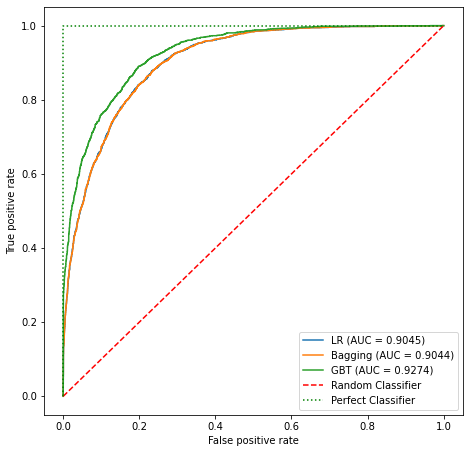

In [78]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(fpr1, tpr1, label='LR (AUC = %0.4f)' % (roc_auc1))
plt.plot(fpr2, tpr2, label='Bagging (AUC = %0.4f)' % (roc_auc2))
plt.plot(fpr3, tpr3, label='GBT (AUC = %0.4f)' % (roc_auc3))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

In [79]:
probs4 = rand_grid_search.predict_proba(X_test_new)
preds4 = probs4[:,1]
fpr4, tpr4, threshold = metrics.roc_curve(y_test_new, preds4)
roc_auc4 = metrics.auc(fpr4, tpr4)

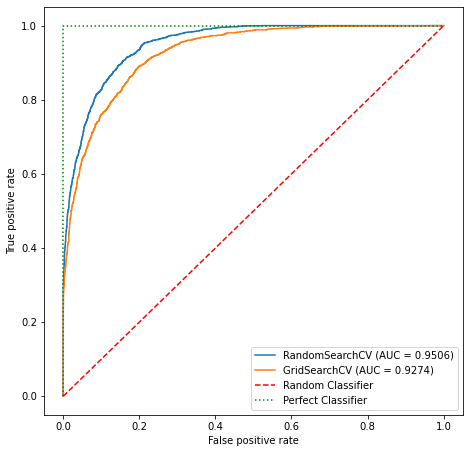

In [99]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(fpr4, tpr4, label='RandomSearchCV (AUC = %0.4f)' % (roc_auc4))
plt.plot(fpr3, tpr3, label='GridSearchCV (AUC = %0.4f)' % (roc_auc3))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()